# Dataset 

In [2]:
# Veri seti Acıklaması
# Veri seti Adı: Hmelq bir banka verisidir. İnsanların çeşitli niteliklere göre kredilerini ödeyip ödemedigi 
# bilgilerini tutar

#*BAD:The response(or Y) variable is BAD, which is coded as 0 (good risk) or 1 (bad risk).

#*LOAN: The amount of the loan requested( İstenen kredi miktarı) 
#(Daha az kredi talep eden adayların gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek olmalıdır)

#*MORTDUE: How much the customer needs to pay on their mortgage(Müşterinin ipotek ödemesinde ne kadar ödeme yapması gerekiyor)
#(Daha az ipoteğe sahip olan başvuru sahiplerinin gelecekteki kredilerde temerrüde düşmeme ihtimalleri daha yüksek) 

#*VALUE: Assessed valuation (Değerlendirilen değer, geçerli vergileri ölçmek için bir mülke atanan dolar değeridir)
#(Mevcut mülkün değeri daha düşükse, gelecekteki kredilerde temerrüde düşme olasılığı daha az olmalıdır)

#*REASON: Debt consolidation or home improvement (DebtCon or HomeImp) (Ödemesi gelen borcu ertelemekj için alınan kredi)
#(Krediyi kullanma sebebinin temerrüde düşme şansı üzerinde de etkisi olabilir)

#*JOB: Broad job category
#*YOJ: Years on the job

#*DEROG: Number of derogatory reports (Negatif bir rapor , ödemeni geç yaparsan , ödemezsen vb.)
#(Aşağılayıcı raporlar kredi geçmişinde her zaman olumsuz bir işarettir ve bu sütundaki herhangi 
 #bir sayı gelecekte yüksek varsayılan temerrüt şansını göstermelidir.)
    
#*DELINQ: The number of delinquent trade lines (or credit accounts) (Aylık ödemesini 30günden fazla geciktirme sayısı)
#(Bir kişi geçmişte birkaç kez temerrüde düşmüş olsaydı, temerrüt şansı daha yüksek olurdu)
#(Ödenmemiş borçların sayısı)

#*CLAGE: Age of oldest trade line (oldest tradeline= credit account)
#*NINQ: Number of recent credit inquiries (Soft inquiries are usually made when you request a credit report or credit score for yourself.)
#*CLNO: Number of trade lines

#*DEBTINC: Debt to income ratio (Borç - Gelir oranı. Aylık toplam borcunun aylık toplam gelirine bölümü ile çıkarılan yüzdelik oran)
#(Bir kişinin gelir konusunda yüksek borcu varsa, o kişinin daha fazla borç geri ödemesi zor olacaktır, 
#bu nedenle bu rakamdaki yüksek bir rakam temerrüte düşmesi daha fazladır)

In [3]:
# İmport Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
hmelq=pd.read_csv("hmelq.csv")
df=hmelq.copy()

In [5]:
df.shape# veri seti 3576 gözlemden ve 13  değişkenden oluşmaktadır

(3576, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [7]:
df.dtypes

bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        float64
derog      float64
delinq     float64
clage      float64
ninq       float64
clno       float64
debtinc    float64
dtype: object

In [8]:
# veri setindeki numeric degiskenleri secip özet istatistiklere bakıldı
df_num=df.select_dtypes(include=['float64','int64'])
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,3576.0,0.199385,0.399594,0.00,0.00,0.000,0.00,1.000
loan,3576.0,18529.697987,11262.834060,1100.00,11000.00,16200.000,23100.00,89900.000
mortdue,3262.0,74013.907992,44016.833772,2619.00,46700.25,65858.000,91717.00,399550.000
value,3512.0,101076.922759,54865.275351,8800.00,65753.00,89183.000,118928.25,850000.000
yoj,3264.0,8.832644,7.568046,0.00,3.00,7.000,13.00,41.000
derog,3149.0,0.261670,0.865178,0.00,0.00,0.000,0.00,10.000
delinq,3225.0,0.432558,1.099230,0.00,0.00,0.000,0.00,15.000
clage,3397.0,179.832529,87.066198,0.49,115.60,173.640,230.71,1168.230
ninq,3273.0,1.186373,1.728723,0.00,0.00,1.000,2.00,17.000
clno,3443.0,21.507116,10.167490,0.00,15.00,20.000,26.00,71.000


In [9]:
# veri setindeki kategorik degiskenler secilir
cat_df=df.select_dtypes(include=["object"])
cat_df

,reason,job
0,HomeImp,NaN
1,DebtCon,NaN
2,DebtCon,NaN
3,DebtCon,NaN
4,DebtCon,NaN
...,...,...
3571,DebtCon,Self
3572,DebtCon,Self
3573,DebtCon,Self
3574,HomeImp,Self


In [10]:
# kategorik degiskenlerin frekans bilgisi 
print(df["bad"].value_counts())
print(df["reason"].value_counts())
print(df["job"].value_counts())


0    2863
1     713
Name: bad, dtype: int64
DebtCon    2371
HomeImp    1058
Name: reason, dtype: int64
Other     1431
ProfEx     767
Office     569
Mgr        461
Self       115
Sales       66
Name: job, dtype: int64


##  Exploratory Data Analysis (EDA)

In [11]:
# degiskenlerin  birbiriyle olan korelasyonlarına bakıldı 
df_num.corr()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


In [12]:
# degiskenlere ait histogram grafikleri

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


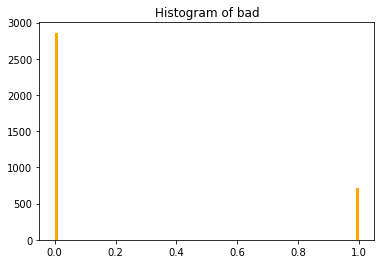

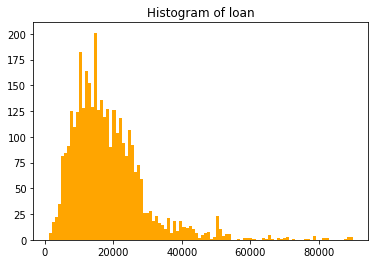

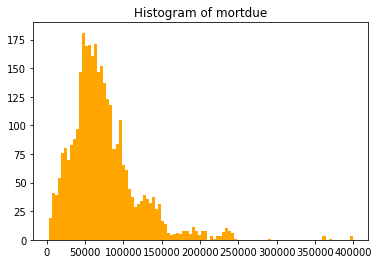

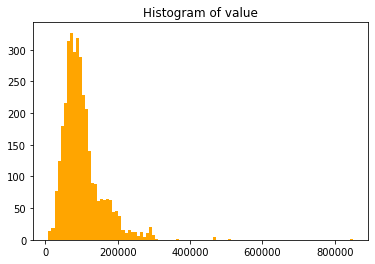

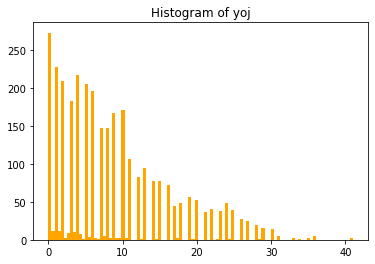

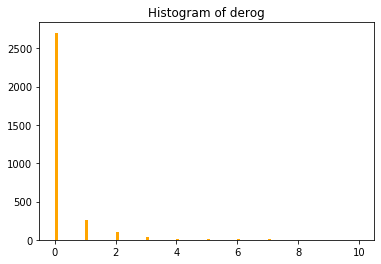

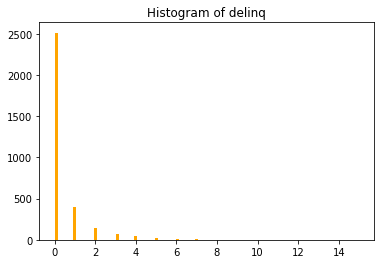

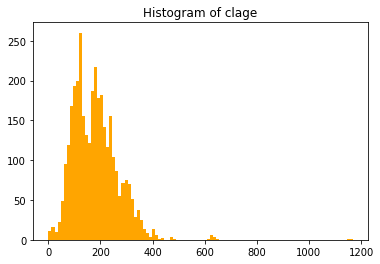

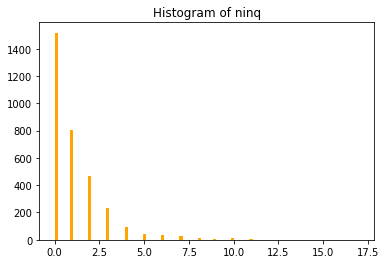

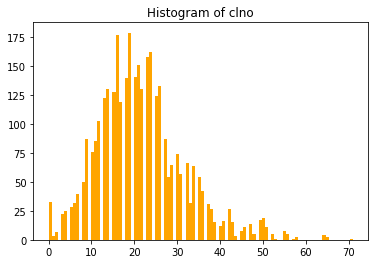

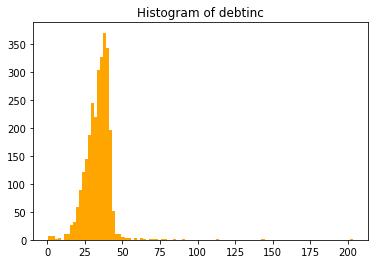

In [79]:
for i in df_num.columns:
    plt.figure()
    plt.hist(df_num[i],bins=100,color="orange")
    plt.title("Histogram of "+ i)
    

In [ ]:
# Histogram grafiklerine bakıldığında değişkenlerin bazıları normal dağılım seyrinde gözlemlenirken bazıları gaussian dağılım göstermemiştir.

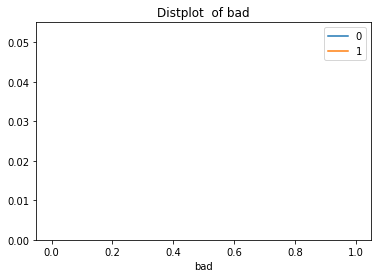

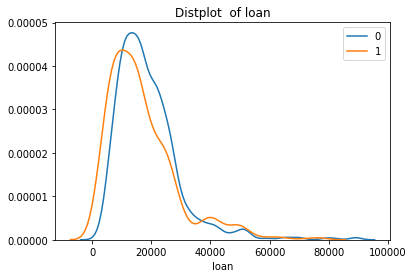

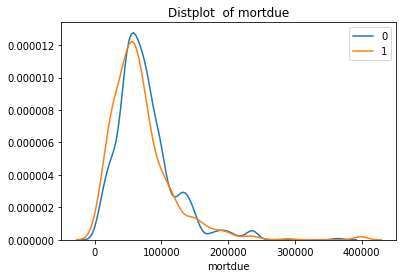

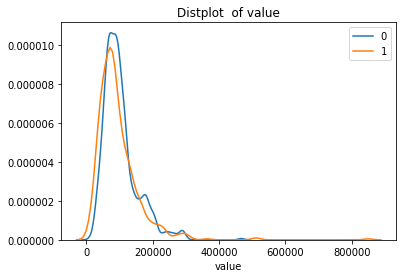

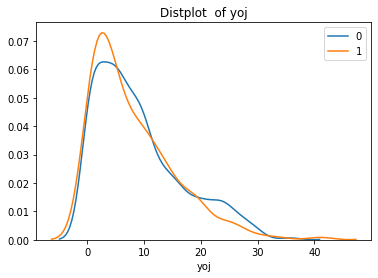

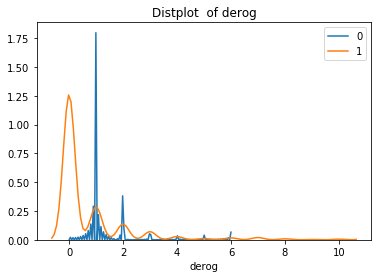

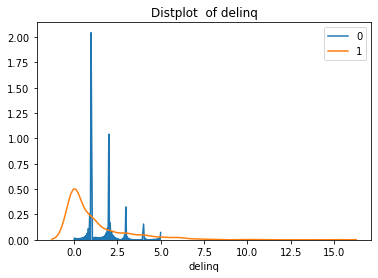

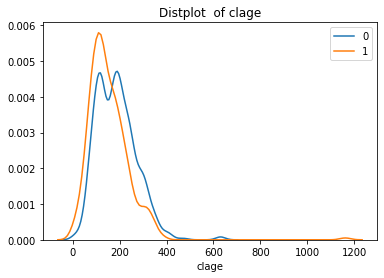

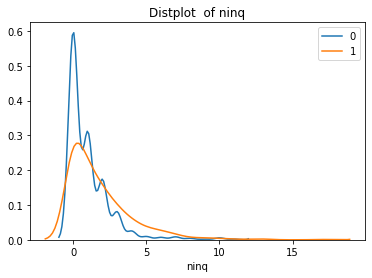

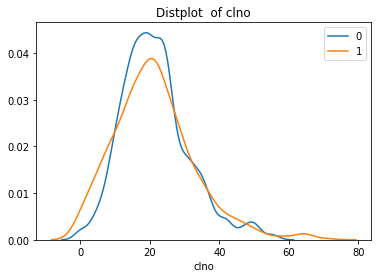

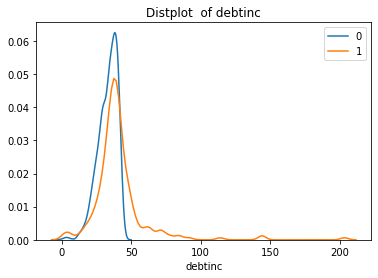

In [76]:

for i in  df_num.columns:
    plt.figure()
    sns.distplot(df_num[i][df_num["bad"] == 0],label=0, hist=False)
    sns.distplot(df_num[i][df_num["bad"] == 1],label=1, hist=False)
    plt.title("Distplot  of "+ i)
    plt.legend()

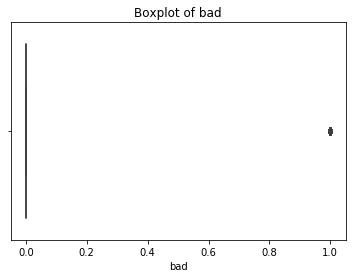

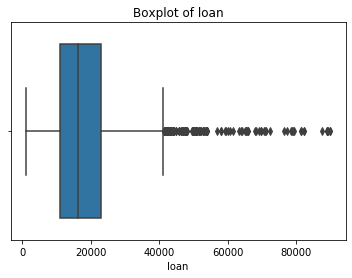

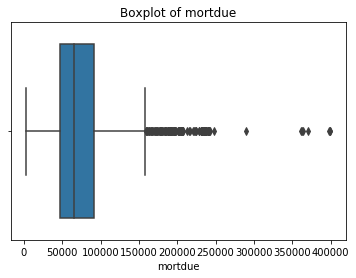

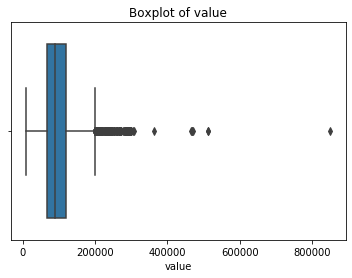

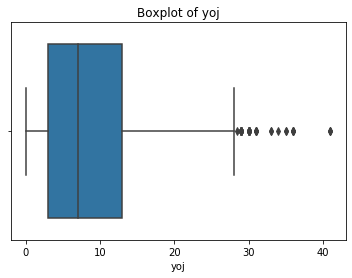

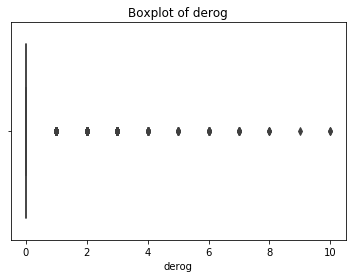

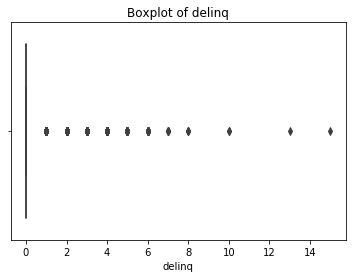

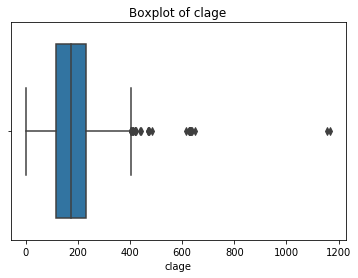

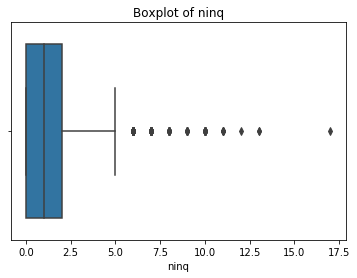

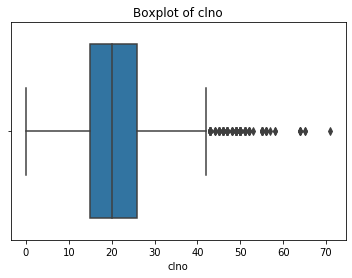

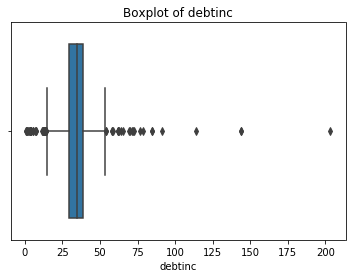

In [77]:
# Degiskenlerin  boxplot yardımıyla görsellestirilmesi
for i in df_num.columns:
    plt.figure()
    sns.boxplot(df_num[i])
    plt.title("Boxplot of "+ i)


In [ ]:
# Boxplot grafikleri incelendiğinde bütün değişkenlerde aykırı değerlerin olduğu gözlemlenmiştir.

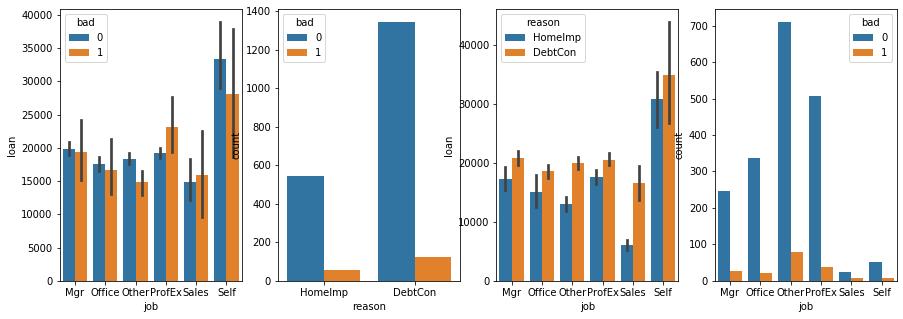

In [78]:
# Kategorik degiskenlerin frekans bilgisi barplot ve countplot yardımıyla çıkarıldı 
fig, ax = plt.subplots(1, 4, figsize = (15, 5))
sns.barplot(x='job', y='loan', hue='bad', data=df, ax=ax[0])
sns.countplot('reason', hue='bad', data=df, ax=ax[1])
sns.barplot(x='job', y='loan', hue='reason', data=df, ax=ax[2])
sns.countplot('job', hue='bad', data=df, ax=ax[3])
#plt.tight_layout()

In [ ]:
# job ve loan değişkenlerinin bad değişkenine göre çaprazlaştırdığımızda ;Self meslek çeşidinin kredi borcunu ödemede daha başarılı olduğu
# gözlenmektedir.

# job ve loan değşkenlerini reason değişkenine göre çaprazlaştırdığımızda meslek gruplarının 
# Debtcon kredi çeşidini daha fazla aldıkları gözlenmiştir.

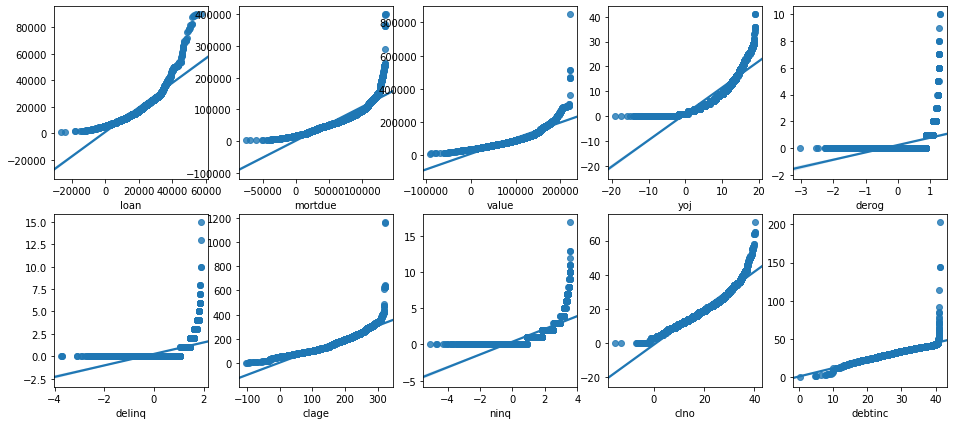

In [80]:
plt.figure(figsize=(16, 7))
for i, column in enumerate(df_num.select_dtypes(exclude=['category']).columns[1:], 1):
    plt.subplot(2, 5, i)
    randNorm = np.random.normal(np.mean(df_num[column]), np.std(df_num[column]), len(df_num[column]))
    sns.regplot(np.sort(randNorm), np.sort(df_num[column]))
    plt.xlabel(f'{column}')


In [ ]:
# Regplot görselleştirmelerini incelediğimizde eğri üzerinde dağılımın yoğun olduğu değişkenlerin clage,clno debtinc 
#değişkenleri gibi değişkenlerin olduğu gözlemlenmekle birlikte,  her değişken kendi içinde aykırı değerlere sahip olduğu bu 
# grafikte rahatça gözlemlenebilmektedir.

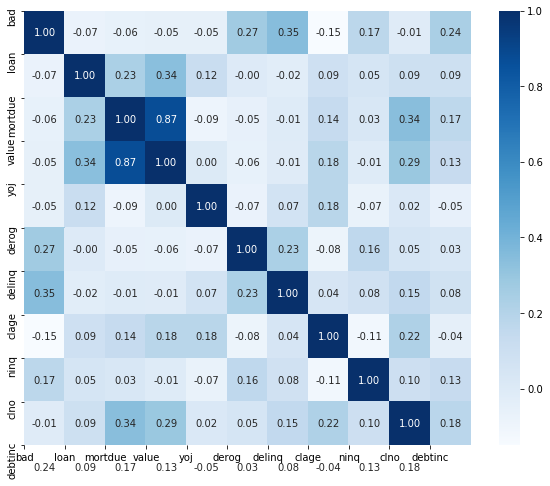

In [81]:
#Korelasyon matrisinin oluşturulması
corr = df_num.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap="Blues",annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
# Korelasyon matrisini incelediğimizde koyu olan renklere baktığımızda değişkenler arasındaki ilişkilerin şiddetini görebiliyoruz.
# mortdue - value değişkeni arasında 0.87 büyüklüğünde şiddetli bir ilişki vardır.
# value - loan değişkenleri arasında 0.34 büyüklüğünde az şiddetli ilişki mevcuttur.
# bad - delinq değişkenleri arasında 0.35  büyüklüğünde az şiddetli ilişki mevcuttur.
# value - clno değişkenleri arasında 0.29 büyüklüğünde az şiddetli bir ilişki mevcuttur.

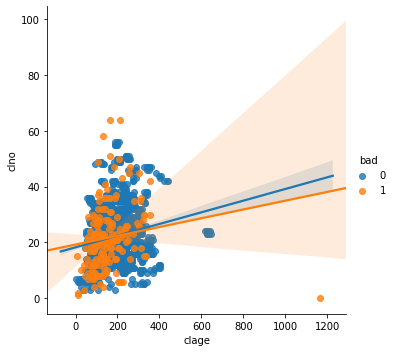

In [82]:
sns.lmplot(x="clage", y="clno", hue="bad", data=df)
# clage ve clno değişkenleri arasındaki ilişkinin bad:0 için daha şiddetli olduğu görülmektedir.

In [ ]:
# clage ve clno değişkenlerini bad değişkeni kırılımında incelediğimizde good risk 

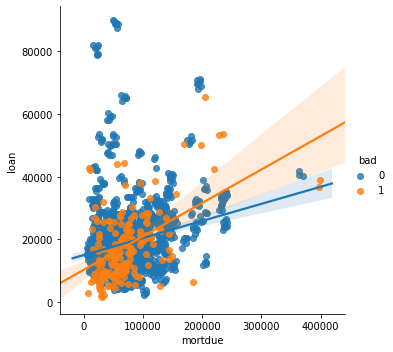

In [83]:
sns.lmplot(x="mortdue", y="loan", hue="bad", data=df)

In [ ]:
# mortdue ve loan değişkenleri arasındaki ilişkinin bad:1 için daha  güçlü olduğu lmplot görselinden görülebilmektedir

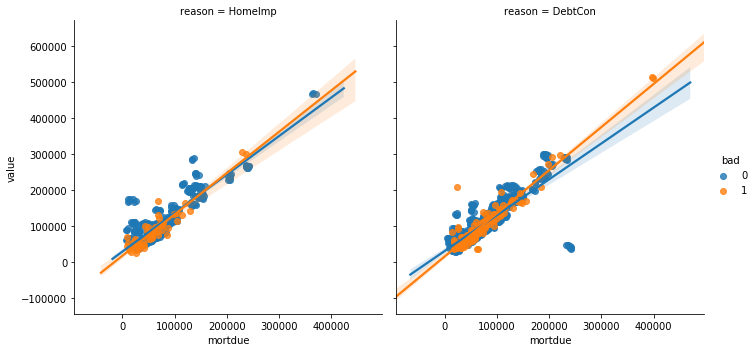

In [84]:
sns.lmplot(x="mortdue", y="value", hue="bad",col= "reason", data=df)

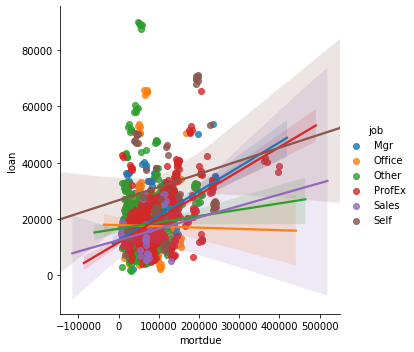

In [85]:
sns.lmplot(x="mortdue", y="loan", hue="job", data=df)

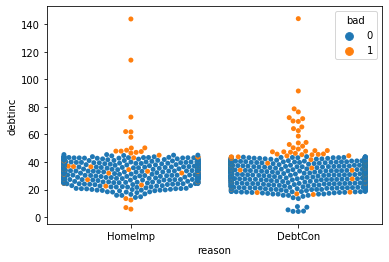

In [87]:
sns.swarmplot(x="reason", y="debtinc",hue="bad", data=df)


In [ ]:
# reason ve debtinc değişkenlerini bad değişkeni ile çaprazlaştırdığımızda Debtcon kredi çeşidi için  borç/gelir oranı yüksek olan değerlerde
# kredisini ödeyememe durumu (bad :1 bad risk) daha fazla gözlemlendiği grafikte görülmektedir

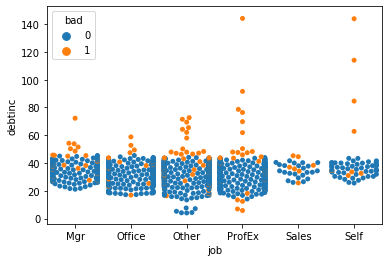

In [88]:
sns.swarmplot(x="job", y="debtinc",hue="bad", data=df)

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


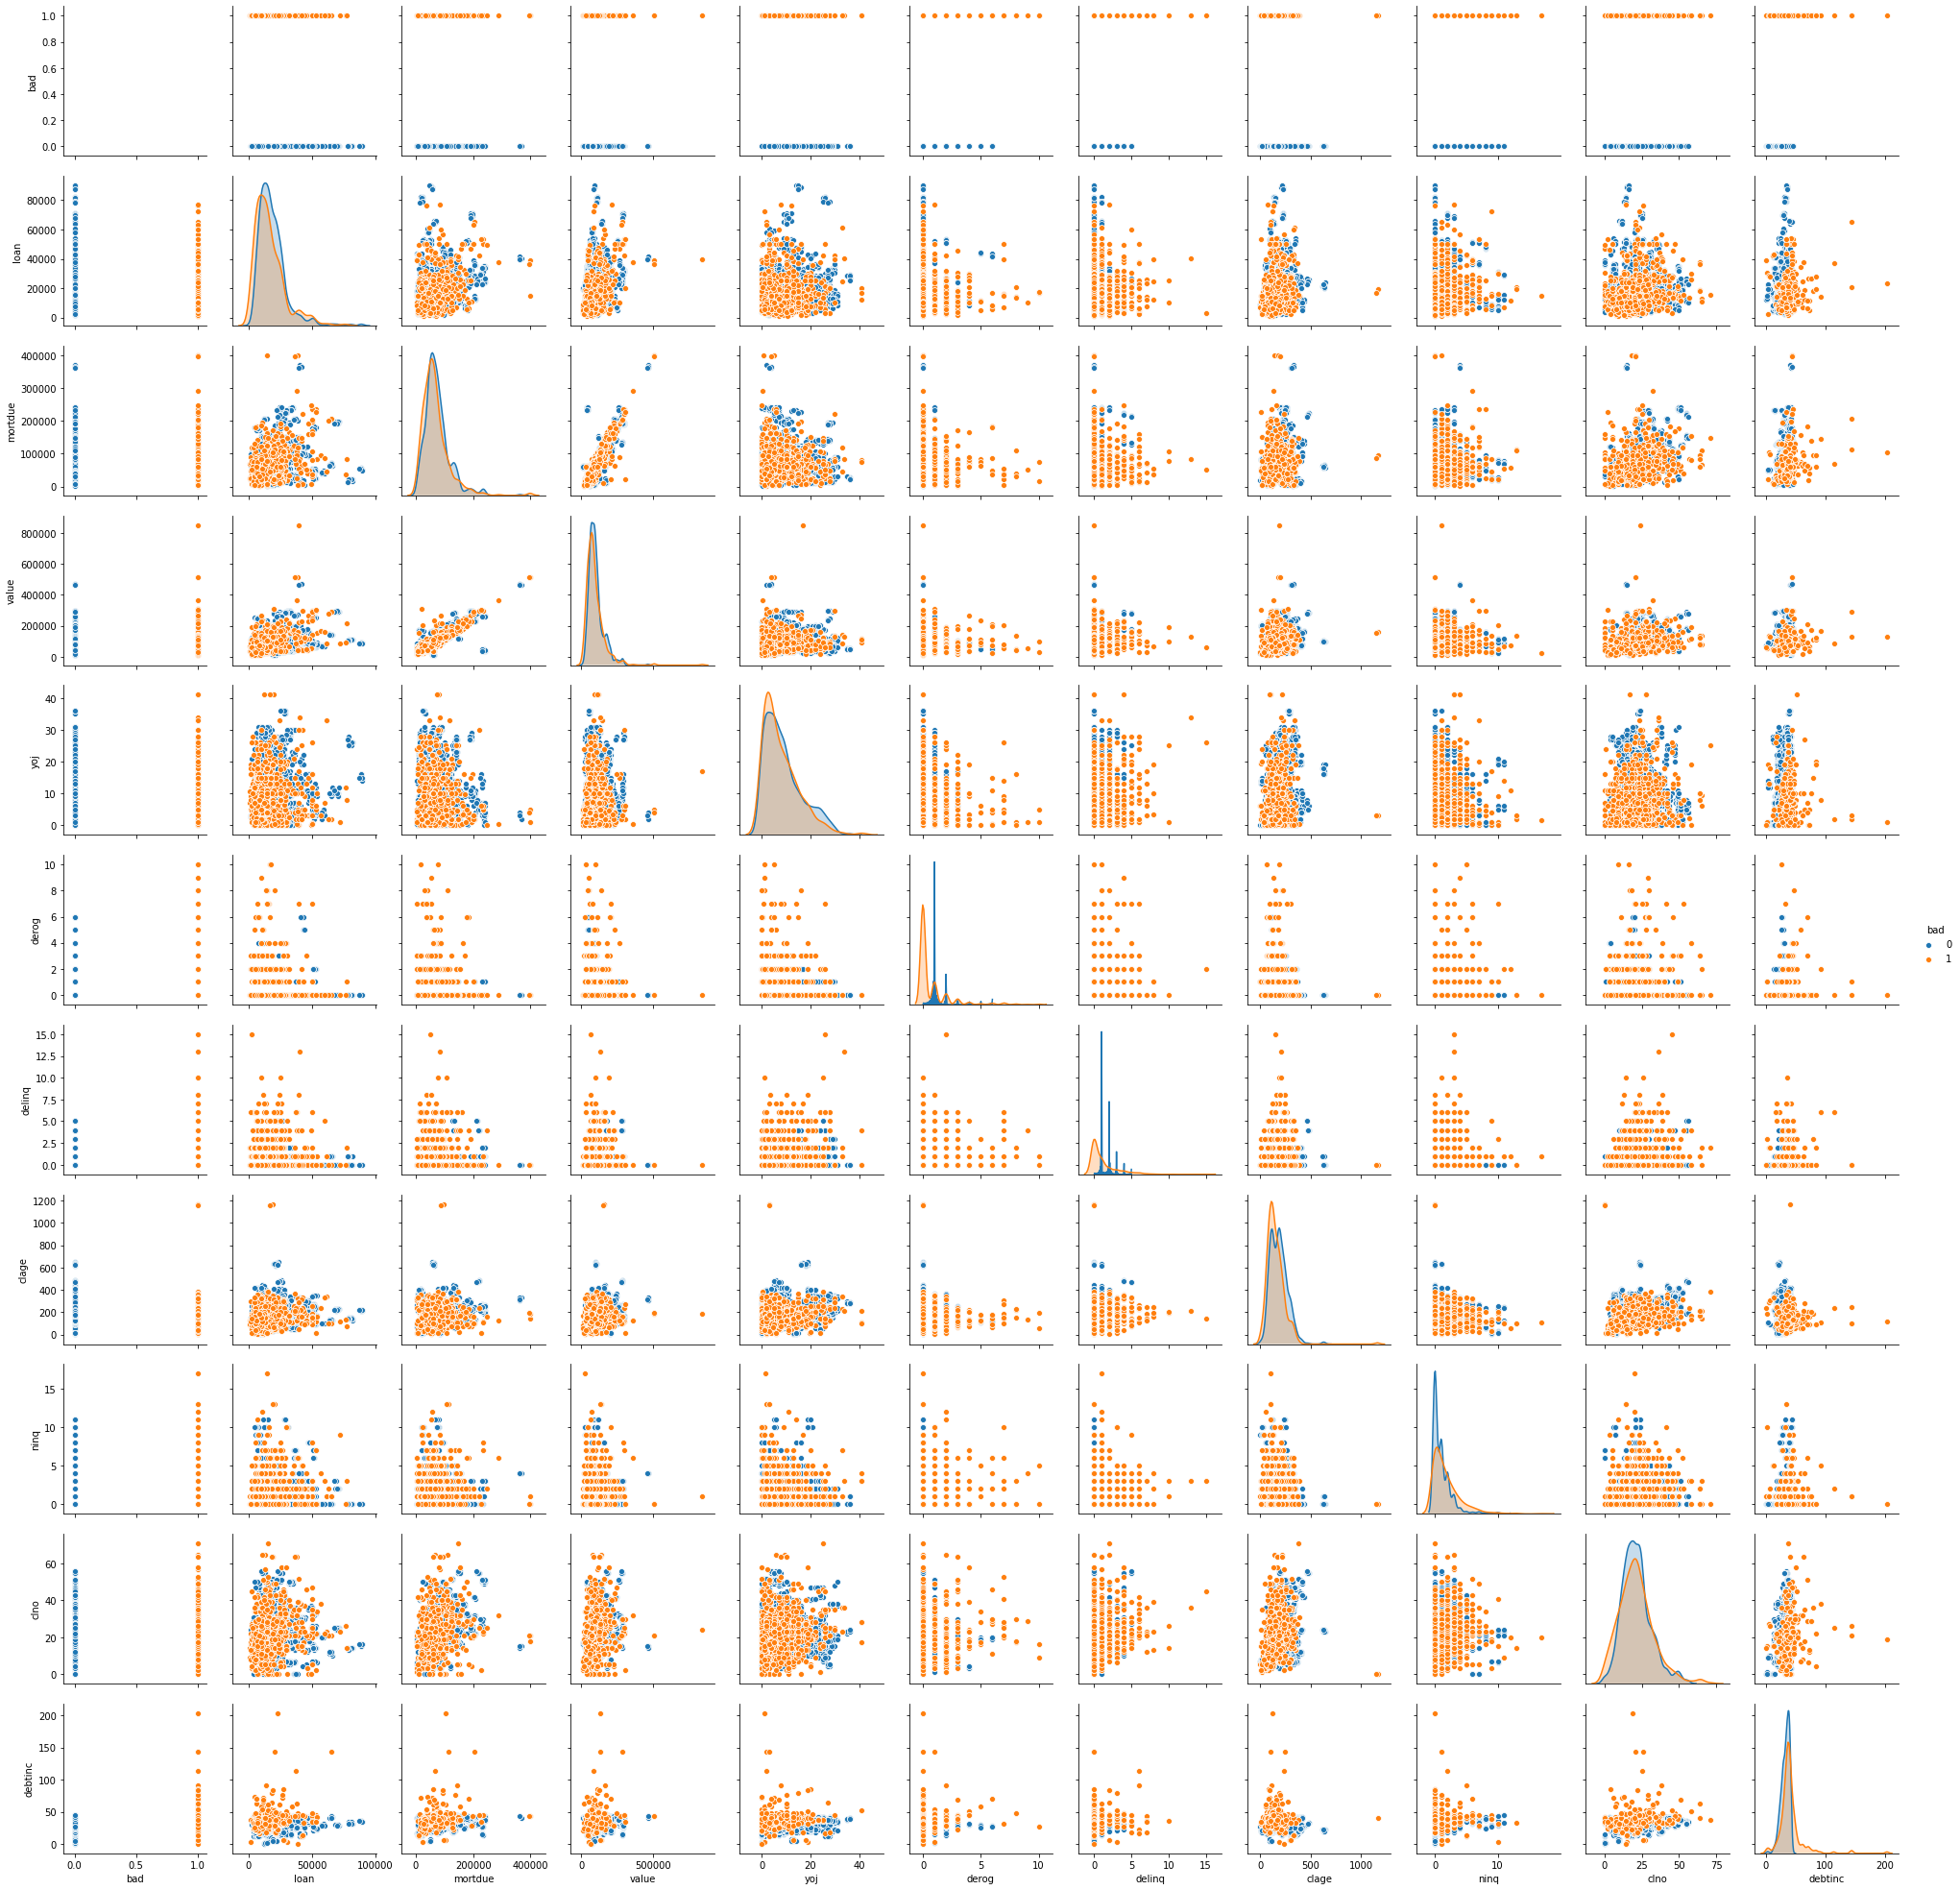

In [89]:
sns.pairplot(data=df_num,hue="bad")

In [26]:
# Pairplot grafiğine baktığımızda daha önce korelasyon matrisi yardımıyla rakamsal olarak gördüğümüz ilişkileri görsel olarak da görebiliyoruz.
# Value ve mortdue değişkenleri arasındaki ilişki gözle görülebilir şekilde pairplotta gözlemlenebilmektedir.

In [27]:
# crosstab()

In [90]:
pd.crosstab(df["bad"],df["reason"],normalize="columns").style.background_gradient(cmap="summer_r")


reason,DebtCon,HomeImp
bad,,
0,0.915531,0.909699
1,0.0844687,0.090301


In [91]:
pd.crosstab(df["bad"],df["job"],normalize="columns").style.background_gradient(cmap="summer_r")

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
0,0.901099,0.938889,0.898734,0.93211,0.766667,0.864407
1,0.0989011,0.0611111,0.101266,0.0678899,0.233333,0.135593


## Gerekli Testlerin Gerçekleştirilmesi

#### Normallik Varsayımı - Shapiro Wilks Testi 

In [92]:
# Normallik testinin hipotezleri :
# H0: Orneklem Normal (Gaussian) dağılımdan gelmektedir, (Fail to reject)
# H1: Orneklem Normal (Gaussian) dağılım gostermemektedir, (Reject)

In [93]:
from scipy import stats

df_new = df.dropna(subset=["mortdue"])
stat, p = stats.shapiro(df_new["mortdue"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.865, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [94]:
df_new = df.dropna(subset=["value"])
stat, p = stats.shapiro(df_new["value"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.845, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [95]:
stat, p = stats.shapiro(df["loan"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.808, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [96]:
df_new = df.dropna(subset=["yoj"])
stat, p = stats.shapiro(df_new["yoj"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.911, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [97]:
df_new = df.dropna(subset=["clage"])
stat, p = stats.shapiro(df_new["clage"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.907, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [98]:
df_new = df.dropna(subset=["derog"])
stat, p = stats.shapiro(df_new["derog"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.276, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [99]:
df_new = df.dropna(subset=["delinq"])
stat, p = stats.shapiro(df_new["delinq"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.373, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [100]:
df_new = df.dropna(subset=["ninq"])
stat, p = stats.shapiro(df_new["ninq"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.667, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [101]:
df_new = df.dropna(subset=["debtinc"])
stat, p = stats.shapiro(df_new["debtinc"])

print("Statistics:%3.3f, p=%.3f " % (stat,p))

alpha = 0.05 
if p>alpha:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
else:
    print("Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")

Statistics:0.823, p=0.000 
Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)


In [102]:
# Döngü yardımıyla shapiro wilks testinin gerçekleştirilmesi
grps=pd.unique(df.bad.values)
for i in df_num.columns:
    for j in grps:
        df_new = df.dropna(subset=[i])
        stat, p = stats.shapiro(df_new[i][df["bad"]==j])
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        alpha = 0.05
        if p>alpha:
            print(i,j," için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)")
        else:
            print(i,j," için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)")
    print("******************************************************************************")

Statistics:1.000, p=1.000 
bad 0  için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)
Statistics:1.000, p=1.000 
bad 1  için Orneklem Normal (Gaussian) Dagilimdan gelmektedir (Fail to Reject H0)
******************************************************************************
Statistics:0.796, p=0.000 
loan 0  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.905, p=0.000 
loan 1  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
******************************************************************************
Statistics:0.879, p=0.000 
mortdue 0  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.751, p=0.000 
mortdue 1  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
******************************************************************************
Statistics:0.859, p=0.000 
value 0  için Orneklem Normal (Gaussian) Dagilimdan gelmemektedir (reject H0)
Statistics:0.733, 

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [106]:
# Örneklem normal dağılımdan gelmediği görülmüştür. Bu nedenle nonparametrik testlerin uygulanması gerekiyor.

#### Varyans Homojenliği Testi - Levene Testi 

In [107]:
# Varyans Homojenliği Testinin Hipotezleri 
# H0 : Varyanslar  Homojendir.
# H1 : Varyanslar Homojen Değildir.

In [47]:
grps=pd.unique(df.bad.values)
for i in df_num.columns:
    for j in grps:
        df_new = df.dropna(subset=[i])
        stat, p = stats.levene(df_new[i][df["bad"]==0],df_new[i][df["bad"]==1])
        print("Statistics:%3.3f, p=%.3f " % (stat,p))
        alpha = 0.05
        if p>alpha:
            print(i,j," için varyans homojendir. (Fail to Reject H0)")
        else:
            print(i,j," için varyans homojen degildir. (reject H0)")
    print("******************************************************************************")

C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2369: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\aayse\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Statistics:nan, p=nan 
bad 0  için varyans homojen degildir. (reject H0)
Statistics:nan, p=nan 
bad 1  için varyans homojen degildir. (reject H0)
******************************************************************************
Statistics:6.343, p=0.012 
loan 0  için varyans homojen degildir. (reject H0)
Statistics:6.343, p=0.012 
loan 1  için varyans homojen degildir. (reject H0)
******************************************************************************
Statistics:0.635, p=0.426 
mortdue 0  için varyans homojendir. (Fail to Reject H0)
Statistics:0.635, p=0.426 
mortdue 1  için varyans homojendir. (Fail to Reject H0)
******************************************************************************
Statistics:5.362, p=0.021 
value 0  için varyans homojen degildir. (reject H0)
Statistics:5.362, p=0.021 
value 1  için varyans homojen degildir. (reject H0)
******************************************************************************
Statistics:2.667, p=0.103 
yoj 0  için varyans homojendir.

In [108]:
# mortdue,yoj,clage varyansları homojendir
# debtinc,clno,ninq,delinq,derog,value,loan varyansları homojen değildir

#### Bağımsız İki Örneklem T Testi

In [109]:
# Normallik Varsayımı ve Varyans Homojenliği Varsayımı  bağımsız iki örneklem t testinin varsayımlarıdır.
# Varsayım testlerini gerçekleştirdikten sonra bağımsız iki örneklem t testini gerçekleştirebiliriz.

In [110]:
import scipy.stats as ttest_ind
for i in df_num.columns:
    df = df.dropna(subset=[i])
    bad_risk=df[df["bad"]==1][i]
    good_risk=df[df["bad"]==0][i]
    t, p = stats.ttest_ind(bad_risk, good_risk, equal_var=False)
    print("ttest_ind: i=%s t = %g  p = %g" % (i,t, p))
    alpha = 0.05
    if p>alpha:
        print(i," ortalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark vardır. (Fail to Reject H0)")
    else:
        print(i," ortalması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)")
    print("******************************************************************************")

ttest_ind: i=bad t = inf  p = 0
bad  ortalması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark yoktur. (reject H0)
******************************************************************************
ttest_ind: i=loan t = -1.24811  p = 0.213341
loan  ortalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark vardır. (Fail to Reject H0)
******************************************************************************
ttest_ind: i=mortdue t = -0.818936  p = 0.413789
mortdue  ortalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark vardır. (Fail to Reject H0)
******************************************************************************
ttest_ind: i=value t = -1.06312  p = 0.28901
value  ortalaması ile  bad değişkeni arasında istatistiksel olarak anlamlı bir fark vardır. (Fail to Reject H0)
******************************************************************************
ttest_ind: i=yoj t = -2.60747  p = 0.00973574
yoj  ortalması ile  bad değiş

In [111]:
# Sonuç olarak bad değişkeninin sınıfları üzerinde clno,value,mortdue ve loan değişkenlerinin istatistiksel olarak bir etkisi vardır.
# Yani clno,value,loan  ve mortdue değişkenleri bad değişkeni üzerinde anlamlıdır diyebiliriz.